In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd /content/drive/MyDrive/Document_QAI/Mock-Project/NER_VLSP2021

/content/drive/.shortcut-targets-by-id/11UUravwfdnkY0cn_SNAPiKduPmCqW4zQ/Document_QAI/Mock-Project/NER_VLSP2021


In [19]:
!pip install transformers
!pip install pyvi
!pip install sentencepiece
!pip install tld
!pip install eli5

     |████████████████████████████████| 106 kB 5.3 MB/s 


In [8]:
import json
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")
from modelling import *
from define_name import *

In [9]:
dir_train = 'dataset/train_update_10t01.pkl'
dir_dev = 'dataset/dev_update_10t01.pkl'
dir_test = 'dataset/test_update_10t01.pkl'
dir_demo = 'dataset/demo.pkl'

with open(PATH_CONFIG, 'r', encoding= 'utf-8') as f:
        config = json.load(f)

In [10]:
config['batch_size'] = 16
config['hyper_parameter']['epochs'] = 5
config['hyper_parameter']['patience'] = 5

In [11]:
ner = NER(config)

Some weights of XLMRobertaModel were not initialized from the model checkpoint at pretrain/xlmr_Model and are newly initialized: ['pooler.dense.weight', 'pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


## 1. Training

In [8]:
train_loader, _ = ner.dataloader.create_dataloader(dir_dev, is_train = True)
dev_loader, _ = ner.dataloader.create_dataloader(dir_dev, is_train = False)

In [9]:
history = ner.train_model(train_loader, dev_loader, 'xlmr_model.pt', 0) 

Epoch:   0%|          | 0/5 [00:00<?, ?it/s]

Traning Process::   0%|          | 0/160 [00:00<?, ?it/s]

Testing Process::   0%|          | 0/160 [00:00<?, ?it/s]

               precision  recall      f1  support
URL               0.0000  0.0000  0.0000       15
IP                0.0000  0.0000  0.0000       11
LOCATION          0.7886  0.7955  0.7920     1301
PHONENUMBER       0.0000  0.0000  0.0000        9
ADDRESS           1.0000  0.0332  0.0643       29
EVENT             0.5216  0.6475  0.5778      207
SKILL             0.0000  0.0000  0.0000       42
MISCELLANEOUS     0.0000  0.0000  0.0000      159
PRODUCT           0.7501  0.5356  0.6250      626
DATETIME          0.7806  0.9337  0.8503     1002
PERSONTYPE        0.6827  0.8028  0.7379      685
ORGANIZATION      0.7048  0.9315  0.8025     1578
PERSON            0.9506  0.9768  0.9635     1904
QUANTITY          0.8568  0.8379  0.8472     1889
EMAIL             0.0000  0.0000  0.0000        7
<===============> loss: 0.9283   f1_span0: 0.1602   val_loss: 0.1517   val_f1_span0: 0.4174
f1_score improved from: 0.0000 to 0.4174
Best model saved to xlmr_model.pt


Epoch:  20%|██        | 1/5 [07:13<28:54, 433.66s/it]

Traning Process::   0%|          | 0/160 [00:00<?, ?it/s]

Testing Process::   0%|          | 0/160 [00:00<?, ?it/s]

               precision  recall      f1  support
URL               0.6562  0.8000  0.7210       15
IP                1.0000  0.3636  0.5333       11
LOCATION          0.8773  0.8963  0.8867     1301
PHONENUMBER       1.0000  0.1368  0.2406        9
ADDRESS           0.6324  0.9354  0.7546       29
EVENT             0.6510  0.8107  0.7221      207
SKILL             0.0000  0.0000  0.0000       42
MISCELLANEOUS     0.7198  0.1922  0.3034      159
PRODUCT           0.7290  0.8145  0.7694      626
DATETIME          0.8652  0.9594  0.9099     1002
PERSONTYPE        0.7006  0.8990  0.7875      685
ORGANIZATION      0.8080  0.9585  0.8769     1578
PERSON            0.9829  0.9757  0.9793     1904
QUANTITY          0.9004  0.8891  0.8947     1889
EMAIL             0.0000  0.0000  0.0000        7
<===============> loss: 0.1393   f1_span0: 0.5097   val_loss: 0.0865   val_f1_span0: 0.6253
f1_score improved from: 0.4174 to 0.6253
Best model saved to xlmr_model.pt


Epoch:  40%|████      | 2/5 [14:13<21:16, 425.62s/it]

Traning Process::   0%|          | 0/160 [00:00<?, ?it/s]

Testing Process::   0%|          | 0/160 [00:00<?, ?it/s]

               precision  recall      f1  support
URL               1.0000  0.9333  0.9655       15
IP                1.0000  0.8182  0.9000       11
LOCATION          0.9112  0.9425  0.9266     1301
PHONENUMBER       1.0000  0.8889  0.9412        9
ADDRESS           0.6369  0.9947  0.7766       29
EVENT             0.7068  0.9089  0.7952      207
SKILL             1.0000  0.0385  0.0741       42
MISCELLANEOUS     0.6365  0.4615  0.5350      159
PRODUCT           0.8068  0.9026  0.8520      626
DATETIME          0.9185  0.9585  0.9381     1002
PERSONTYPE        0.8701  0.8708  0.8705      685
ORGANIZATION      0.8886  0.9649  0.9252     1578
PERSON            0.9850  0.9878  0.9864     1904
QUANTITY          0.9330  0.9047  0.9186     1889
EMAIL             1.0000  1.0000  1.0000        7
<===============> loss: 0.0902   f1_span0: 0.6525   val_loss: 0.0571   val_f1_span0: 0.8270
f1_score improved from: 0.6253 to 0.8270
Best model saved to xlmr_model.pt


Epoch:  60%|██████    | 3/5 [21:13<14:05, 422.78s/it]

Traning Process::   0%|          | 0/160 [00:00<?, ?it/s]

Testing Process::   0%|          | 0/160 [00:00<?, ?it/s]

               precision  recall      f1  support
URL               1.0000  0.9333  0.9655       15
IP                0.9880  1.0000  0.9940       11
LOCATION          0.9209  0.9589  0.9395     1301
PHONENUMBER       1.0000  0.8889  0.9412        9
ADDRESS           0.7869  0.9947  0.8787       29
EVENT             0.8608  0.8714  0.8661      207
MISCELLANEOUS     0.6561  0.5846  0.6183      159
SKILL             0.8095  0.4071  0.5418       42
PRODUCT           0.8444  0.9284  0.8844      626
DATETIME          0.9196  0.9737  0.9459     1002
PERSONTYPE        0.8237  0.9289  0.8731      685
ORGANIZATION      0.9319  0.9663  0.9488     1578
PERSON            0.9921  0.9892  0.9907     1904
QUANTITY          0.9315  0.9240  0.9277     1889
EMAIL             1.0000  1.0000  1.0000        7
<===============> loss: 0.0684   f1_span0: 0.8131   val_loss: 0.0453   val_f1_span0: 0.8877
f1_score improved from: 0.8270 to 0.8877
Best model saved to xlmr_model.pt


Epoch:  80%|████████  | 4/5 [28:13<07:01, 421.66s/it]

Traning Process::   0%|          | 0/160 [00:00<?, ?it/s]

Testing Process::   0%|          | 0/160 [00:00<?, ?it/s]

               precision  recall      f1  support
URL               1.0000  0.9333  0.9655       15
IP                0.9880  1.0000  0.9940       11
LOCATION          0.9474  0.9509  0.9492     1301
PHONENUMBER       1.0000  0.8889  0.9412        9
ADDRESS           0.7928  1.0000  0.8844       29
EVENT             0.8571  0.9066  0.8812      207
SKILL             0.8218  0.5680  0.6717       42
MISCELLANEOUS     0.6915  0.5809  0.6314      159
PRODUCT           0.8402  0.9330  0.8842      626
DATETIME          0.9316  0.9716  0.9512     1002
PERSONTYPE        0.8667  0.9208  0.8930      685
ORGANIZATION      0.9339  0.9731  0.9531     1578
PERSON            0.9909  0.9889  0.9899     1904
QUANTITY          0.9329  0.9289  0.9309     1889
EMAIL             1.0000  1.0000  1.0000        7
<===============> loss: 0.0566   f1_span0: 0.8662   val_loss: 0.0409   val_f1_span0: 0.9014
f1_score improved from: 0.8877 to 0.9014
Best model saved to xlmr_model.pt


Epoch: 100%|██████████| 5/5 [35:12<00:00, 422.48s/it]


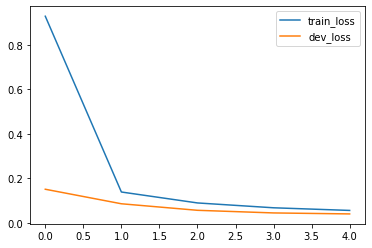

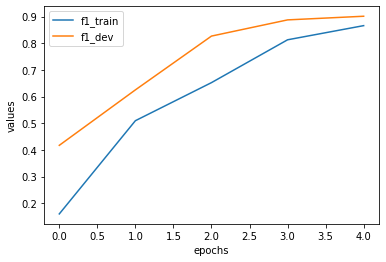

In [13]:
plt.plot(history['train_loss_values'], label='train_loss')
plt.plot(history['valid_loss_values'], label='dev_loss')
plt.legend()
plt.show()
plt.plot(history['f1_train_list'], label='f1_train')
plt.plot(history['f1_dev_list'], label='f1_dev')
plt.xlabel('epochs')
plt.ylabel('values')
plt.legend()
plt.show()

## 2. Predict

In [15]:
sentence = """Tôi là sinh viên Tân ."""
result = ner.predict(sentence)
utils.visualize_spacy(result)

## 3. Evaluate

In [15]:
loss, f1, rp, _ = ner.evaluate(dev_loader)

Testing Process::   0%|          | 0/160 [00:00<?, ?it/s]

In [17]:
loss, f1, rp

(0.0410653471830301,
 0.8122758569815528,
 {'ADDRESS': {'f1': 0.7937,
   'precision': 0.7353,
   'recall': 0.8621,
   'support': 29},
  'DATETIME': {'f1': 0.8959,
   'precision': 0.8775,
   'recall': 0.9152,
   'support': 1002},
  'EMAIL': {'f1': 1.0, 'precision': 1.0, 'recall': 1.0, 'support': 7},
  'EVENT': {'f1': 0.75, 'precision': 0.7327, 'recall': 0.7681, 'support': 207},
  'IP': {'f1': 0.8571, 'precision': 0.9, 'recall': 0.8182, 'support': 11},
  'LOCATION': {'f1': 0.9081,
   'precision': 0.9047,
   'recall': 0.9116,
   'support': 1301},
  'MISCELLANEOUS': {'f1': 0.4149,
   'precision': 0.4085,
   'recall': 0.4214,
   'support': 159},
  'ORGANIZATION': {'f1': 0.9182,
   'precision': 0.8982,
   'recall': 0.9392,
   'support': 1578},
  'PERSON': {'f1': 0.9837,
   'precision': 0.9837,
   'recall': 0.9837,
   'support': 1904},
  'PERSONTYPE': {'f1': 0.8289,
   'precision': 0.7976,
   'recall': 0.8628,
   'support': 685},
  'PHONENUMBER': {'f1': 0.9412,
   'precision': 1.0,
   'recall

## 4. Interpret

In [14]:
from xai import *

In [16]:
xai_lime(ner, sentence, 3)

{'O': {'proba': 0.007155077807743049,
  'scores': [-1.1180445124617262,
   -1.5249427724870108,
   -5.182028841719707,
   -7.507593777869737,
   -2.0056539746970525,
   -0.9201712554210173,
   -0.43310879762332144]},
 'PERSON': {'proba': 4.510068788664646e-05,
  'scores': [-1.8194396016153718,
   -2.4372526569389414,
   -2.3358785294589084,
   -0.8530430608996413,
   -0.613407067864632,
   -1.3878853276924825,
   -1.3878853276924825]},
 'PERSONTYPE': {'proba': 0.9927998215043703,
  'scores': [1.095418600939272,
   1.3042462051442238,
   5.034851245394826,
   7.504337719697217,
   2.114527055909674,
   1.1112102585459342,
   0.5087925339117252]},
 'sent': 'Tôi là sinh viên Tân . .'}

# LOAD MODEL

In [12]:
ner.load_model('model/xlmr_span2_10t01_pool_nocat.pt')